KHẢO SÁT MỨC LƯƠNG DỰA VÀO SẮC TỘC VÀ QUỐC GIA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

filePath = "C:/Users/DELL/Downloads/archive/Salary_Data_Based_country_and_race.csv"
df = pd.read_csv(filePath)
df

# mức lương trung bình theo số năm kinh nghiệm 
# range exp (1 đến 3, 4 đến 7, 8 đến 11, 11 trở lên)
# mối tương qua giữa age và exp
# biểu đồ phân bố 



,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [3]:
df.info()
# salary có số data non null khác với những cột khác -> tồn tại NaN data
# số lượng ít -> bỏ cũng không ảnh hưởng đến kết quả chung 

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [4]:
def case_when(*args):
    return np.select(
        condlist = args[::2],
        choicelist = args[1::2],
        default=pd.NA
    )

df['Education Level Fix'] = case_when(df['Education Level'] == "Bachelor's","Bachelor's Degree",
                                       df['Education Level']=="Bachelor's Degree","Bachelor's Degree",
                                       df['Education Level'] == "Master's","Master's Degree",
                                       df['Education Level'] == "Master's Degree","Master's Degree",
                                       df['Education Level'] == "phD","PhD",
                                       df['Education Level'] == "PhD","PhD",
                                       df['Education Level'] == "High School","High School")

In [6]:
df.head(5)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Education Level Fix
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,Bachelor's Degree
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,Master's Degree
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,PhD
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,Bachelor's Degree
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian,Master's Degree


In [9]:
Data = df.dropna()
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6698 non-null   int64  
 1   Age                  6698 non-null   float64
 2   Gender               6698 non-null   object 
 3   Education Level      6698 non-null   object 
 4   Job Title            6698 non-null   object 
 5   Years of Experience  6698 non-null   float64
 6   Salary               6698 non-null   float64
 7   Country              6698 non-null   object 
 8   Race                 6698 non-null   object 
 9   Education Level Fix  6698 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 575.6+ KB


In [10]:
Data.describe(include="all")
# gender = (3671/6698)*100
# gender

# edu = (2265/6698)*100
# edu

# job = (518/6698)*100
# job

# country = (1359/6698)*100
# country

# race = (1962/6698)*100
# race

# bảng trên có số liệu độ tuổi từ 21 đến 62 tuổi
# Đa số người tham gia khảo sát là nam chiếm 54,8%
# Đa số người có có bằng cử nhân chiếm 33,8%
# Công việc phổ biến nhất là software engineer chiếm 7,7%
# Trung bình năm làm việc là 8
# Phần lớn đến từ Mỹ chiếm 20,2% và là người da trắng chiếm 29.3%



,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Education Level Fix
count,6698.000000,6698.000000,6698,6698,6698,6698.000000,6698.000000,6698,6698,6698
unique,NaN,NaN,3,7,191,NaN,NaN,5,10,4
top,NaN,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN,USA,White,Bachelor's Degree
freq,NaN,NaN,3671,2265,518,NaN,NaN,1359,1962,3021
mean,3351.922216,33.623022,NaN,NaN,NaN,8.095178,115329.253061,NaN,NaN,NaN
std,1934.949414,7.615784,NaN,NaN,NaN,6.060291,52789.792507,NaN,NaN,NaN
min,0.000000,21.000000,NaN,NaN,NaN,0.000000,350.000000,NaN,NaN,NaN
25%,1676.250000,28.000000,NaN,NaN,NaN,3.000000,70000.000000,NaN,NaN,NaN
50%,3352.500000,32.000000,NaN,NaN,NaN,7.000000,115000.000000,NaN,NaN,NaN
75%,5026.750000,38.000000,NaN,NaN,NaN,12.000000,160000.000000,NaN,NaN,NaN


Text(0.5, 1.0, 'Phân bố lương theo sắc tộc')

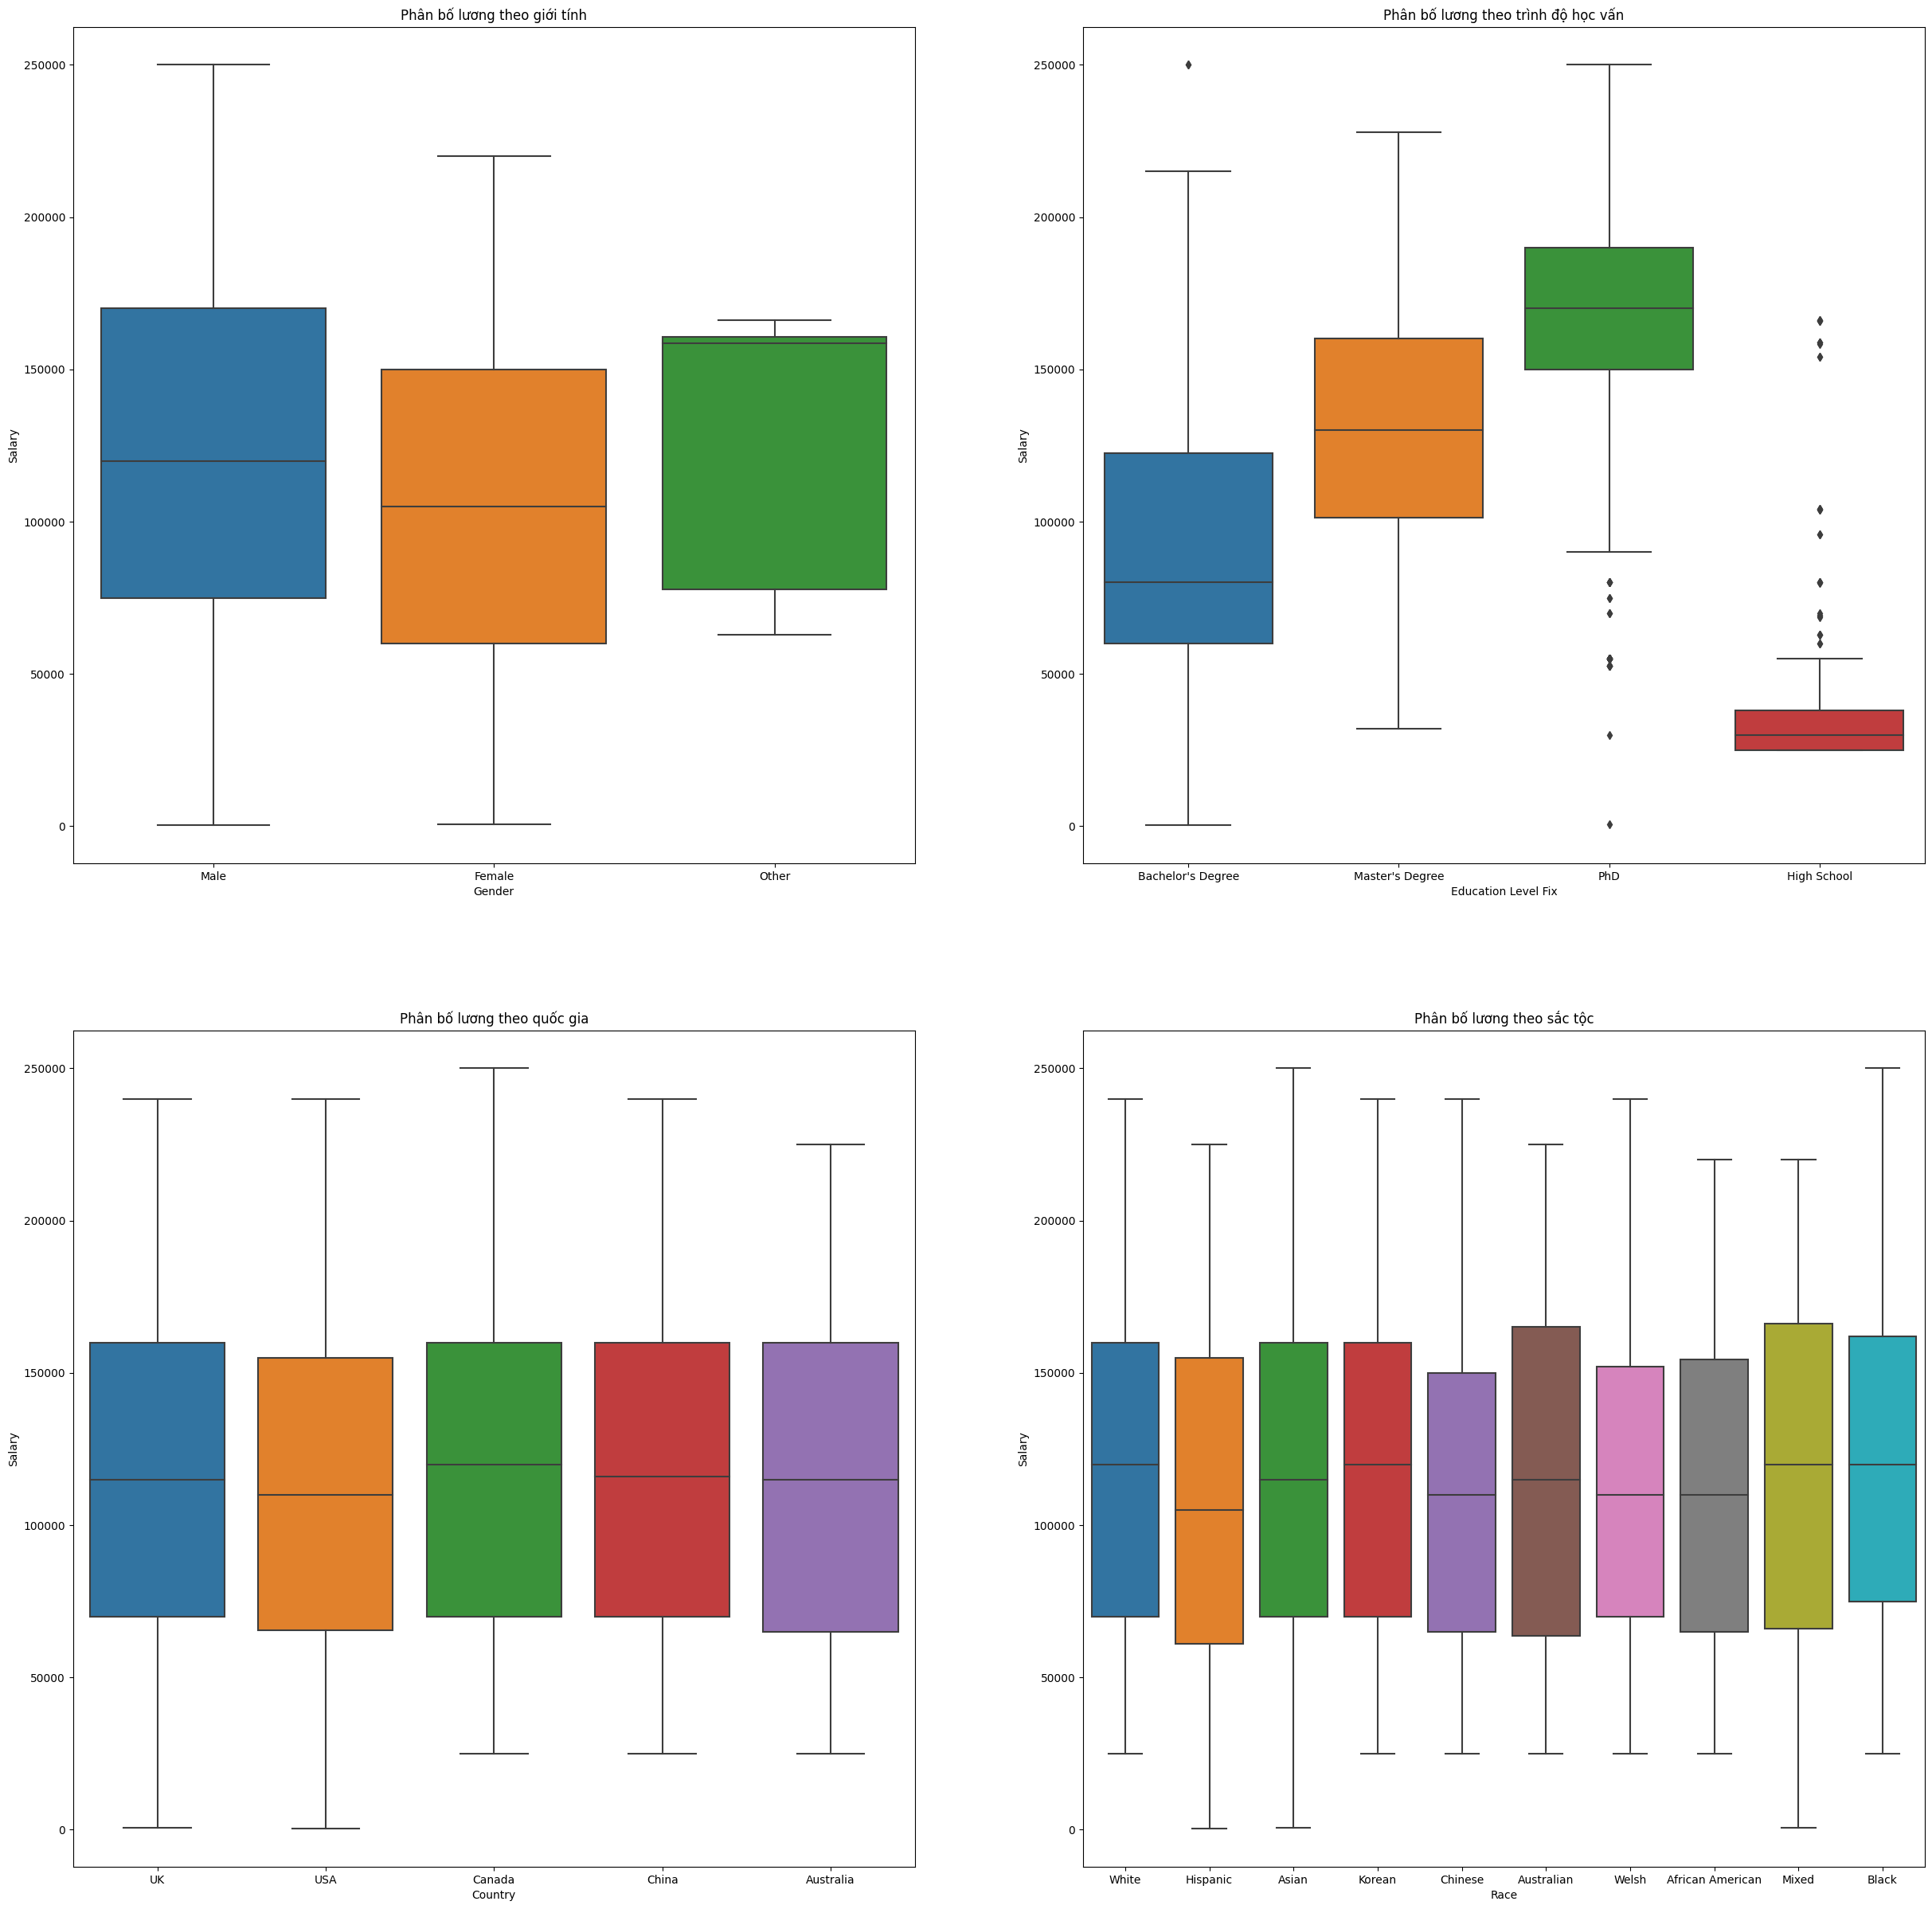

In [17]:
plt.figure(figsize = (30,30),dpi=100)

# lương theo giới tính
plt.subplot(2,2,1)
sns.boxplot(data=df,x="Gender",y="Salary")
plt.title("Phân bố lương theo giới tính")

# lương theo trình độ học vấn
plt.subplot(2,2,2)
sns.boxplot(data=Data, x="Education Level Fix", y="Salary")
plt.title('Phân bố lương theo trình độ học vấn')

# lương theo Quốc gia
plt.subplot(2,2,3)
sns.boxplot(data=df,x="Country",y="Salary")
plt.title("Phân bố lương theo quốc gia")

#lương theo sắc tộc
plt.subplot(2,2,4)
sns.boxplot(data=df,x="Race",y="Salary")
plt.title("Phân bố lương theo sắc tộc")

Text(0.5, 1.0, 'Biểu đồ tương quan giữa tuổi và số năm kinh nghiệm')

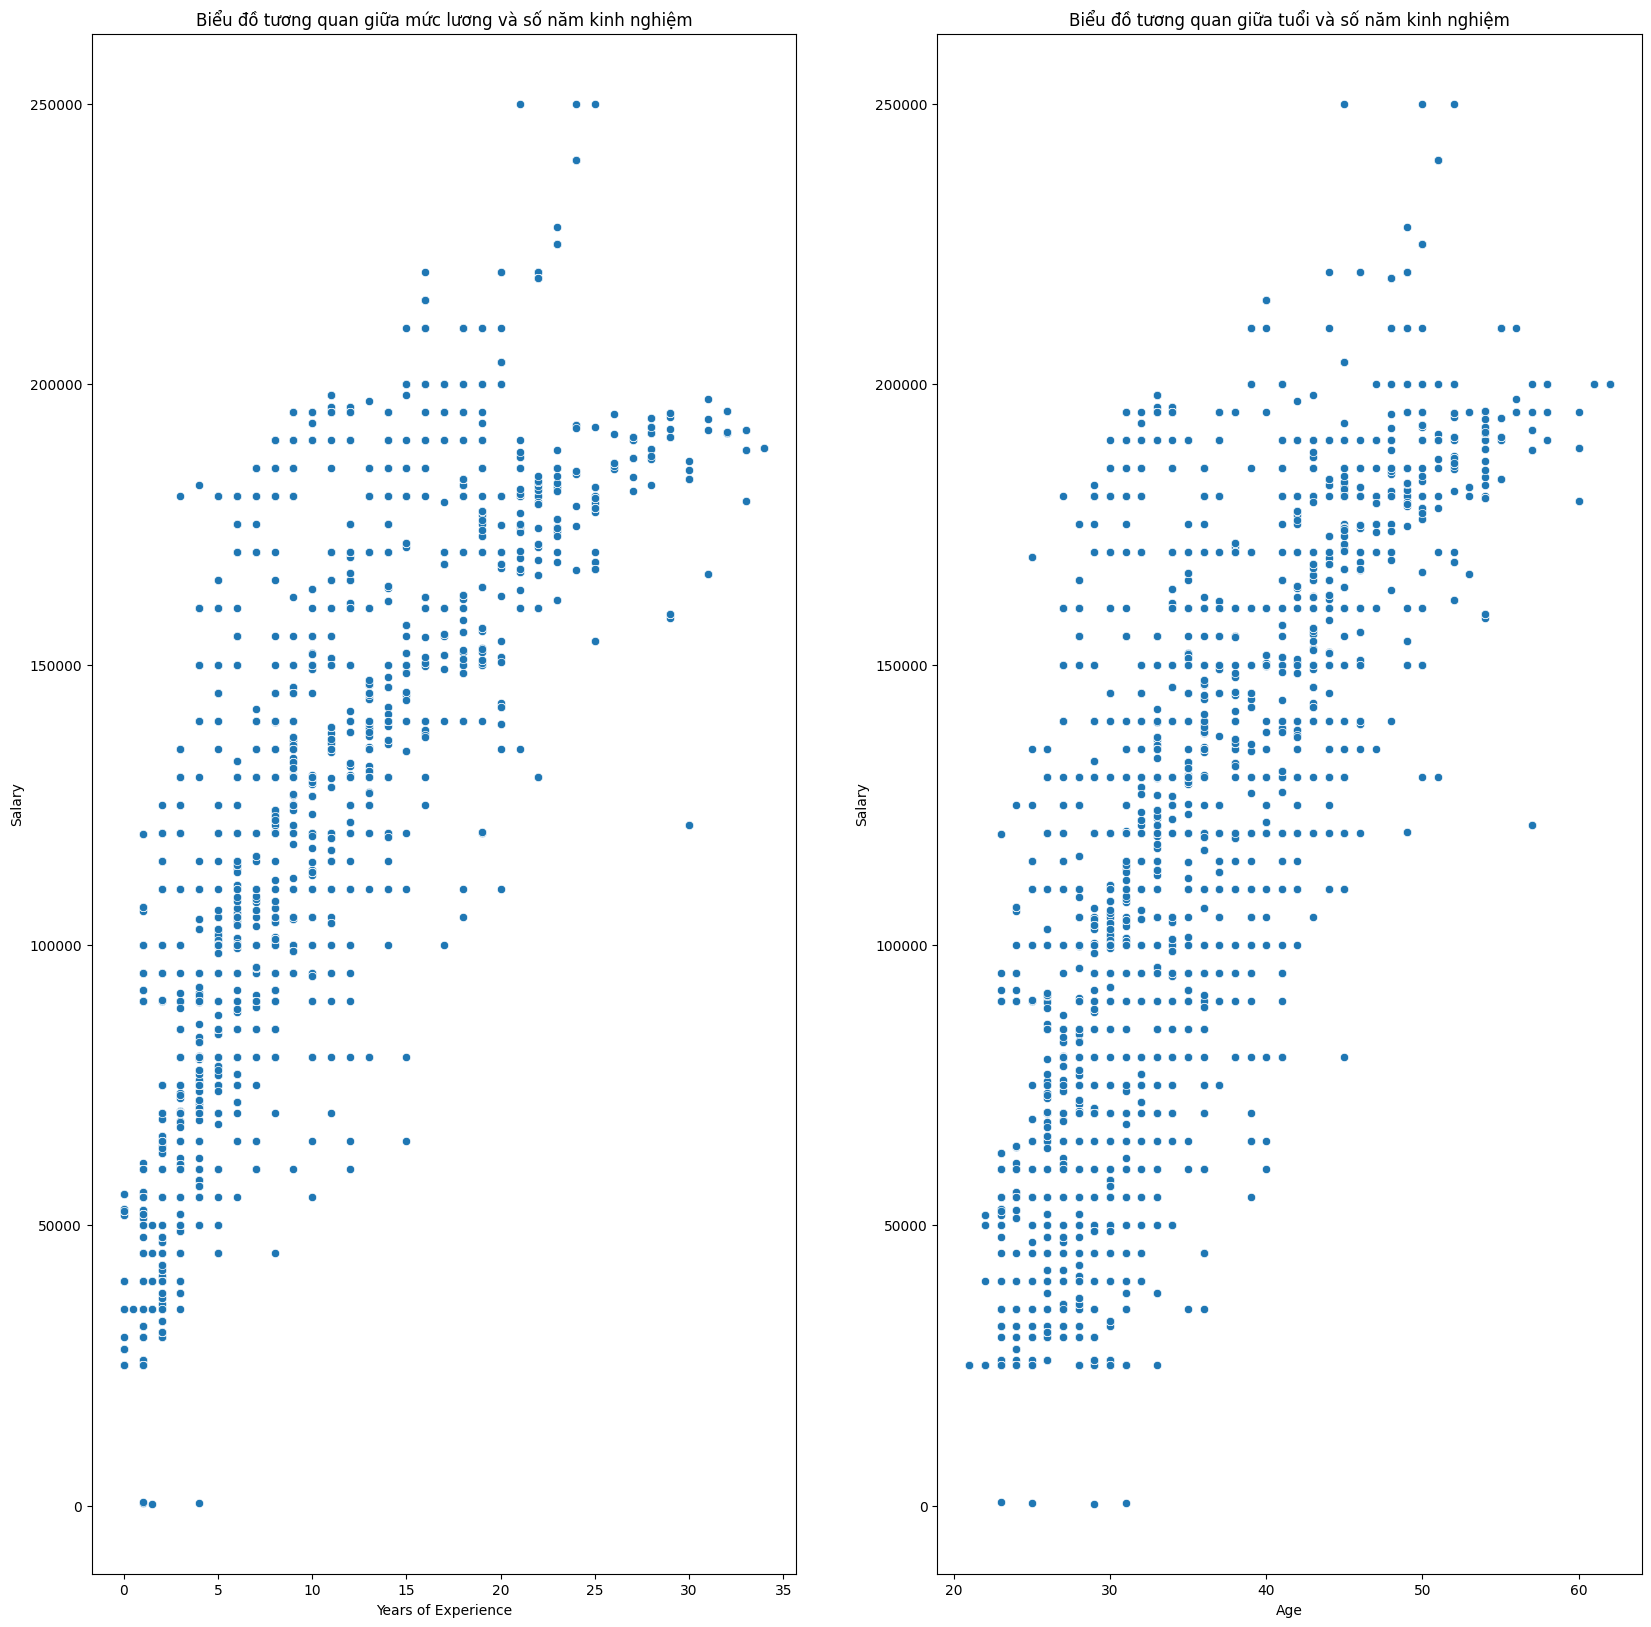

In [30]:
plt.figure(figsize=(20,20),dpi=100)
# phân bố lương theo số năm kinh nghiệm
plt.subplot(1,2,1)
sns.scatterplot(data=df,x="Years of Experience",y="Salary")
plt.title("Biểu đồ tương quan giữa mức lương và số năm kinh nghiệm")

# phân bố lương theo số tuổi
plt.subplot(1,2,2)
sns.scatterplot(data=df,x="Age",y="Salary")
plt.title("Biểu đồ tương quan giữa tuổi và số năm kinh nghiệm")


Text(0.5, 1.0, 'Ma trận tương quan giữa tuổi, lương và số năm kinh nghiệm')

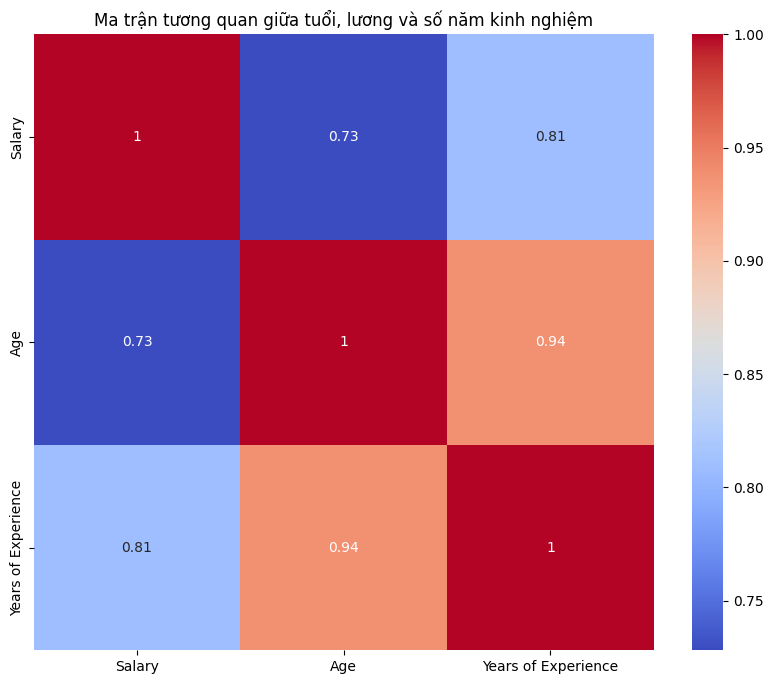

In [31]:
# ma trận tương quan giữa tuổi, lương và kinh nghiệm
plt.figure(figsize=(10,8))
metric = df[["Salary","Age","Years of Experience"]]
sns.heatmap(metric.corr(),annot=True,cmap="coolwarm")
plt.title("Ma trận tương quan giữa tuổi, lương và số năm kinh nghiệm")